In [1]:
# The purpose of this ipynb is to examine the relationship between the factors and the q_15

import os
import requests
import pandas as pd
import numpy as np
import datetime
import glob
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.linear_model as sk_lm
import sklearn.metrics as sk_m


In [72]:
df = pd.read_excel("fulldata.xlsx")
df_equi = pd.read_excel("fulldata_with_equi.xlsx")
df = df.iloc[1: , :]

In [7]:
df.columns

Index(['date_time', 'Hour', 'RES forecast', 'Load forecast', 'Mandatory Hydro',
       'Residual Load', 'avai_lignite', 'avai_natural_gas', 'avai_hydro',
       'QUANTITY', 'q_15', 'q_55', 'q_60', 'q_65', 'q_70', 'q_25', 'q_50',
       'q_75', 'q_80', 'q_85', 'q_90', 'q_95', 'q_100', 'UNITPRICE', 'p_15',
       'p_55', 'p_60', 'p_65', 'p_70', 'p_25', 'p_50', 'p_75', 'p_80', 'p_85',
       'p_90', 'p_95', 'p_100', 'Residual Load Diff'],
      dtype='object')

In [73]:
df.columns = [col.replace(' ', '_') for col in df.columns]
df_equi.columns = [col.replace(' ', '_') for col in df_equi.columns]
# df = df.rename(columns={"RES forecast": "RES_forecast", "Load forecast": "Load_forecast", 
#                    "Mandatory Hydro": "Mandatory_Hydro", "Residual Load": "Residual_Load",
#                    "Residual Load Diff": "Residual_Load_Diff"})


In [25]:
df_train, df_test = train_test_split(df, train_size = 0.7,
                                           random_state = 123,
                                           shuffle = True)
df_train_q_15 = df_train[['q_15','RES_forecast','Load_forecast','Mandatory_Hydro','Residual_Load','avai_lignite','avai_natural_gas', 'Residual_Load_Diff']]
df_test_q_15 = df_test[['q_15','RES_forecast','Load_forecast','Mandatory_Hydro','Residual_Load','avai_lignite','avai_natural_gas', 'Residual_Load_Diff']]

In [28]:
# Fit a linear regression model on the training set
lm_q_15 = sk_lm.LinearRegression()
lm_q_15.fit(df_train_q_15.loc[:, df_train_q_15.columns != 'q_15'], df_train_q_15.q_15)
preds_q_15 = lm_q_15.predict(df_test_q_15.loc[:, df_test_q_15.columns != 'q_15'])

In [29]:
print("Predicting q_15")
sk_m.r2_score(df_test_q_15.q_15, preds_q_15)

Predicting q_15


0.9714811670146682

In [31]:
df_train, df_test = train_test_split(df, train_size = 0.7,
                                           random_state = 123,
                                           shuffle = True)
df_train_q_75 = df_train[['q_75','RES_forecast','Load_forecast','Mandatory_Hydro','Residual_Load','avai_lignite','avai_natural_gas', 'Residual_Load_Diff']]
df_test_q_75 = df_test[['q_75','RES_forecast','Load_forecast','Mandatory_Hydro','Residual_Load','avai_lignite','avai_natural_gas', 'Residual_Load_Diff']]

In [33]:
# Fit a linear regression model on the training set
lm_q_75 = sk_lm.LinearRegression()
lm_q_75.fit(df_train_q_75.loc[:, df_train_q_75.columns != 'q_75'], df_train_q_75.q_75)
preds_q_75 = lm_q_75.predict(df_test_q_75.loc[:, df_test_q_75.columns != 'q_75'])

In [34]:
print("Predicting q_75")
sk_m.r2_score(df_test_q_75.q_75, preds_q_75)

Predicting q_75


0.8601332382783387

In [35]:
df_train, df_test = train_test_split(df, train_size = 0.7,
                                           random_state = 123,
                                           shuffle = True)
df_train_q_95 = df_train[['q_95','RES_forecast','Load_forecast','Mandatory_Hydro','Residual_Load','avai_lignite','avai_natural_gas', 'Residual_Load_Diff']]
df_test_q_95 = df_test[['q_95','RES_forecast','Load_forecast','Mandatory_Hydro','Residual_Load','avai_lignite','avai_natural_gas', 'Residual_Load_Diff']]

In [36]:
# Fit a linear regression model on the training set
lm_q_95 = sk_lm.LinearRegression()
lm_q_95.fit(df_train_q_95.loc[:, df_train_q_95.columns != 'q_95'], df_train_q_95.q_95)
preds_q_95 = lm_q_95.predict(df_test_q_95.loc[:, df_test_q_95.columns != 'q_95'])
print("Predicting q_95")
sk_m.r2_score(df_test_q_95.q_95, preds_q_95)

Predicting q_95


0.8489443401925544

In [37]:
df_train.columns

Index(['date_time', 'Hour', 'RES_forecast', 'Load_forecast', 'Mandatory_Hydro',
       'Residual_Load', 'avai_lignite', 'avai_natural_gas', 'avai_hydro',
       'QUANTITY', 'q_15', 'q_55', 'q_60', 'q_65', 'q_70', 'q_25', 'q_50',
       'q_75', 'q_80', 'q_85', 'q_90', 'q_95', 'q_100', 'UNITPRICE', 'p_15',
       'p_55', 'p_60', 'p_65', 'p_70', 'p_25', 'p_50', 'p_75', 'p_80', 'p_85',
       'p_90', 'p_95', 'p_100', 'Residual_Load_Diff'],
      dtype='object')

In [40]:
import statsmodels.formula.api as smf
reg_q_15 = smf.ols('''q_15 ~ RES_forecast + Load_forecast + Mandatory_Hydro +
                avai_lignite + avai_natural_gas''', data=df_train)
reg_q_15_result = reg_q_15.fit()


In [41]:
reg_q_15_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   q_15   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                 1.131e+04
Date:                Sun, 10 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:38:18   Log-Likelihood:                -10671.
No. Observations:                1612   AIC:                         2.135e+04
Df Residuals:                    1606   BIC:                         2.139e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          204.6155     78.674      2.601      0.009      50.302     358.929
RES_forecast         0.9400      0.005    185.136      0.000       0.930       0.950
Load_forecast        0.0690      0.004     16.356      0.000       0.061       0.077
Mandatory_Hydro      0.9373      0.009    102.229      0.000       0.919       0.955
avai_lignite         0.2575      0.040      6.495      0.000       0.180       0.335
avai_natural_gas     0.0124      0.013      0.989      0.323      -0.012       0.037
==============================================================================
Omnibus:                       58.417   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.293
Skew:                           0.406   Prob(JB):                     3.30e-16
Kurtosis:                       3.634   Cond. No.                     1.33e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
import sklearn
from sklearn.linear_model import LinearRegression

In [75]:
df_equi_train, df_equi_test = train_test_split(df_equi, train_size = 0.7,
                                           random_state = 123,
                                           shuffle = True)

In [76]:
df_equi_test.columns

Index(['Unnamed:_0', 'Hour', 'RES_forecast', 'Load_forecast',
       'Mandatory_Hydro', 'Residual_Load', 'avai_lignite', 'avai_natural_gas',
       'avai_hydro', 'QUANTITY', 'q_15', 'q_55', 'q_60', 'q_65', 'q_70',
       'q_25', 'q_50', 'q_75', 'q_80', 'q_85', 'q_90', 'q_95', 'q_100',
       'UNITPRICE', 'p_15', 'p_55', 'p_60', 'p_65', 'p_70', 'p_25', 'p_50',
       'p_75', 'p_80', 'p_85', 'p_90', 'p_95', 'p_100', 'Residual_Load_Diff',
       'equi_quantity', 'equi_price', 'bucket'],
      dtype='object')

In [107]:
# train = df_train
def lin_reg(target):
    train_x = df_equi_train[['RES_forecast', 'Load_forecast', 'Mandatory_Hydro', 'Residual_Load','avai_lignite', 'avai_natural_gas', 'avai_hydro']]
    train_y = df_equi_train[target]
    test_x = df_equi_test[['RES_forecast', 'Load_forecast', 'Mandatory_Hydro', 'Residual_Load','avai_lignite', 'avai_natural_gas', 'avai_hydro']]
    test_y = df_equi_test[target]
    reg = LinearRegression().fit(train_x, train_y)
    pred_y =reg.predict(test_x)
    return reg.score(train_x, train_y),    reg.score(test_x, test_y)

In [114]:
lin_reg('q_90')

(0.8621311875021505, 0.8768851402623723)

0.7829034501329182

0.7980628403445791

In [101]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(test_y, pred_y)
rmse = sqrt(mse)
print(len(pred_y))
rmse

692


520.7604440618566

In [42]:

reg_eqq = smf.ols('''q_75 ~ RES_forecast + Load_forecast + Mandatory_Hydro +
                Residual_Load + avai_lignite + avai_natural_gas
                + Residual_Load_Diff
                ''', data=df)
reg_eqq_result = reg_eqq.fit()

In [45]:
reg_eqq_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   q_75   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     2437.
Date:                Sun, 10 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:39:13   Log-Likelihood:                -17104.
No. Observations:                2303   AIC:                         3.422e+04
Df Residuals:                    2296   BIC:                         3.426e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           3002.2222    145.853     20.584      0.000    2716.204    3288.240
RES_forecast           0.6414      0.008     78.333      0.000       0.625       0.657
Load_forecast          0.4977      0.006     87.229      0.000       0.487       0.509
Mandatory_Hydro        0.1329      0.012     10.862      0.000       0.109       0.157
Residual_Load         -0.2766      0.006    -43.941      0.000      -0.289      -0.264
avai_lignite          -0.1058      0.074     -1.427      0.154      -0.251       0.040
avai_natural_gas      -0.0507      0.023     -2.178      0.030      -0.096      -0.005
Residual_Load_Diff    -0.1482      0.027     -5.406      0.000      -0.202      -0.094
==============================================================================
Omnibus:                       93.336   Durbin-Watson:                   0.196
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.133
Skew:                           0.518   Prob(JB):                     2.44e-23
Kurtosis:                       2.893   Cond. No.                     2.46e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.76e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [29]:
# ypred = reg_q_15.predict(test[['RES_forecast','Load_forecast','Mandatory_Hydro','Residual_Load','avai_lignite','avai_natural_gas', 'Residual_Load_Diff']])
# reg_q_15.predict(df_test)
# df_test[['RES_forecast','Load_forecast','Mandatory_Hydro','Residual_Load','avai_lignite','avai_natural_gas', 'Residual_Load_Diff']]

In [43]:

reg_q_75 = smf.ols('''q_75 ~ RES_forecast + Load_forecast + Mandatory_Hydro +
                Residual_Load + avai_lignite + avai_natural_gas
                + Residual_Load_Diff
                ''', data=df)
reg_q_75_result = reg_q_75.fit()

In [44]:
reg_q_75_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   q_75   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     2437.
Date:                Sun, 10 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:39:02   Log-Likelihood:                -17104.
No. Observations:                2303   AIC:                         3.422e+04
Df Residuals:                    2296   BIC:                         3.426e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           3002.2222    145.853     20.584      0.000    2716.204    3288.240
RES_forecast           0.6414      0.008     78.333      0.000       0.625       0.657
Load_forecast          0.4977      0.006     87.229      0.000       0.487       0.509
Mandatory_Hydro        0.1329      0.012     10.862      0.000       0.109       0.157
Residual_Load         -0.2766      0.006    -43.941      0.000      -0.289      -0.264
avai_lignite          -0.1058      0.074     -1.427      0.154      -0.251       0.040
avai_natural_gas      -0.0507      0.023     -2.178      0.030      -0.096      -0.005
Residual_Load_Diff    -0.1482      0.027     -5.406      0.000      -0.202      -0.094
==============================================================================
Omnibus:                       93.336   Durbin-Watson:                   0.196
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.133
Skew:                           0.518   Prob(JB):                     2.44e-23
Kurtosis:                       2.893   Cond. No.                     2.46e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.76e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [39]:
test = df[['date_time','QUANTITY','UNITPRICE']].iloc[0]
x = test['QUANTITY'].strip('][').split(', ')
x = [float(i) for i in x][20:-3]
y = test['UNITPRICE'].strip('][').split(', ')
y = [float(i) for i in y][20:-3]

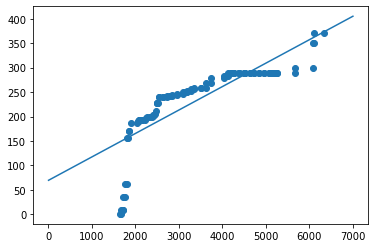

degree 1 score 0.6612590819629034
equation
  
0.0479 x + 69.68


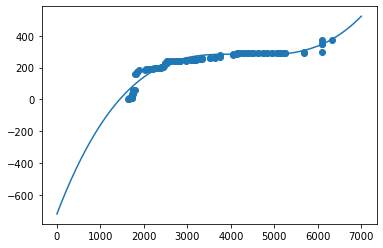

degree 3 score 0.8938258823135194
equation
            3             2
1.302e-08 x - 0.0001676 x + 0.7129 x - 718.8


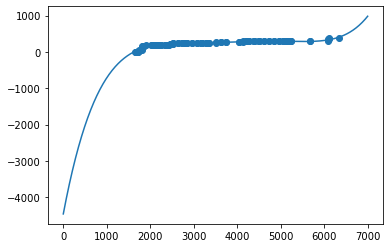

degree 5 score 0.9444480989261481
equation
            5             4             3            2
5.506e-15 x - 1.114e-10 x + 8.785e-07 x - 0.003377 x + 6.357 x - 4468


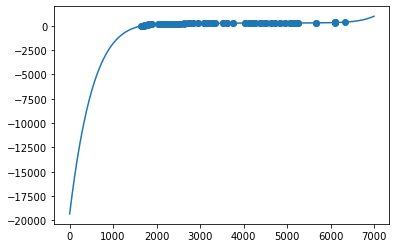

degree 7 score 0.9592411692339625
equation
           7             6             5             4             3
1.23e-21 x - 3.669e-17 x + 4.601e-13 x - 3.137e-09 x + 1.253e-05 x
            2
 - 0.02926 x + 37.01 x - 1.938e+04


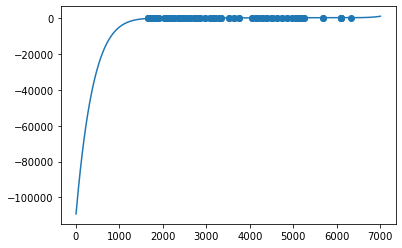

degree 9 score 0.9658499195444901
equation
            9             8             7             6             5
5.668e-28 x - 2.143e-23 x + 3.534e-19 x - 3.331e-15 x + 1.977e-11 x
              4             3          2
 - 7.653e-08 x + 0.0001932 x - 0.3068 x + 278 x - 1.095e+05


In [56]:
from sklearn.metrics import r2_score
for degree in range(1,10,2):
    mymodel = np.poly1d(np.polyfit(x, y, degree))
    myline = np.linspace(1, 7000, 500)
    plt.scatter(x, y)
    plt.plot(myline, mymodel(myline))
    plt.show()

    print('degree',degree, 'score',r2_score(y, mymodel(x)))
    print('equation\n',mymodel)